# Read data and Import libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files
uploaded = files.upload()

Saving transactions.csv to transactions.csv


In [4]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.width = 30

In [8]:
data = pd.read_csv(io.BytesIO(uploaded['transactions.csv']))

In [9]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [11]:
data['customerId'].nunique()

5000

# Converting Data Types (data cleansing)

**Untuk Pos Entry Mode dan Pos Condition Code jangan diubah menjadi string karena ada NaN Value. Harus dibersihkan seperti biasa dahulu**

In [12]:
# converting data types
import datetime
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], format="%Y-%m-%dT%H:%M:%S")
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'], format="%d/%m/%Y")
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'], format="%d/%m/%Y")
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'], format="%d/%m/%Y")
#data['posEntryMode'] =data["posEntryMode"].astype(str)
#data['posConditionCode'] =data["posConditionCode"].astype(str)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                638001 non-null  object        
 8   merchantCountryCode       641290 non-null  object        
 9   posEntryMode              638569 non-null  float64       
 10  posConditionCode          641627 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

# Missing Value Handling (Data Cleansing)

In [14]:
# checking missing values
data.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64

In [15]:
3913 / 641914

0.006095832151970513

In [16]:
data['acqCountry'].fillna(data['acqCountry'].mode()[0], inplace = True)
data['merchantCountryCode'].fillna(data['merchantCountryCode'].mode()[0], inplace = True)
data['posEntryMode'].fillna(data['posEntryMode'].mode()[0], inplace = True)
data['posConditionCode'].fillna(data['posConditionCode'].mode()[0], inplace = True)
data['transactionType'].fillna(data['transactionType'].mode()[0], inplace = True)

In [17]:
data.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

# EDA (Univariate and Bivariate Analysis)

**Target Variable Checking**

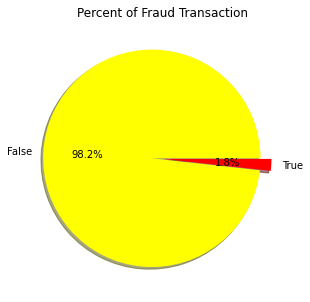

In [18]:
labels = data['isFraud'].value_counts(sort = True).index
sizes =  data['isFraud'].value_counts(sort = True)

colors = ["yellow","red"]
explode = (0.1,0) 

plt.figure(figsize=(7,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title('Percent of Fraud Transaction')
plt.show()

From the plot it can be seen that the target variable is higly imbalanced

In [19]:
cat_features = data.select_dtypes(include=[np.object])
cat_features.columns

<ipython-input-19-3da01fe45e22>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = data.select_dtypes(include=[np.object])


Index(['merchantName',
       'acqCountry',
       'merchantCountryCode',
       'merchantCategoryCode',
       'transactionType'],
      dtype='object')

**Bivariate Analysis (Categorical Column) with Target Variable**

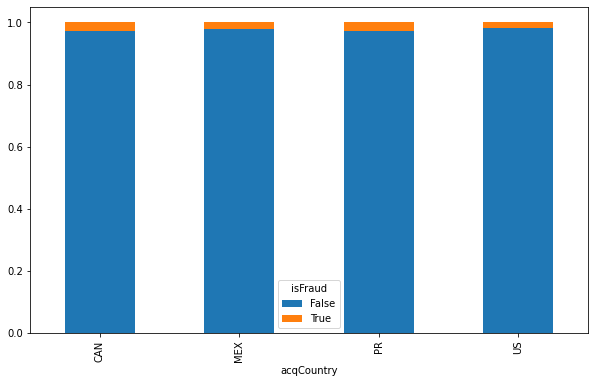

In [20]:
table=pd.crosstab(data.acqCountry,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label')

In [21]:
table=pd.crosstab(data.acqCountry,data.isFraud,normalize='index')
table

isFraud,False,True
acqCountry,,
CAN,0.973262,0.026738
MEX,0.977913,0.022087
PR,0.973378,0.026622
US,0.982456,0.017544


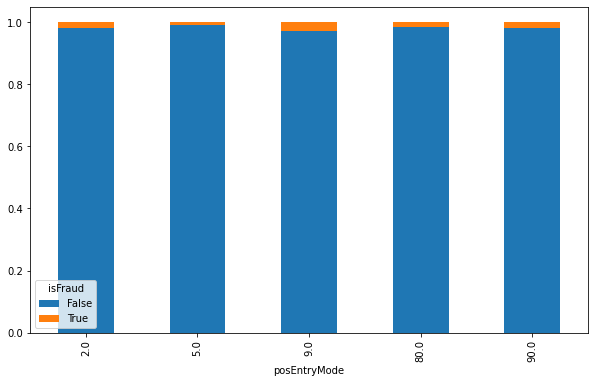

In [22]:
table=pd.crosstab(data.posEntryMode,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label')

In [23]:
data.posEntryMode.unique()

array([ 5.,  9.,  2., 90., 80.])

In [24]:
table=pd.crosstab(data.posEntryMode,data.isFraud,normalize='index')
table

isFraud,False,True
posEntryMode,,
2.0,0.980945,0.019055
5.0,0.990972,0.009028
9.0,0.972116,0.027884
80.0,0.985373,0.014627
90.0,0.979817,0.020183


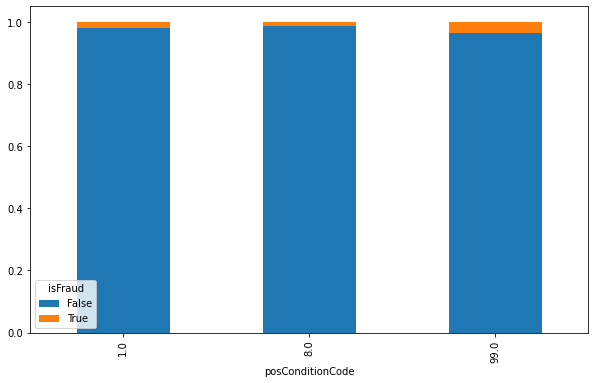

In [25]:
table=pd.crosstab(data.posConditionCode,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label')

In [26]:
table=pd.crosstab(data.posConditionCode,data.isFraud,normalize='index')
table

isFraud,False,True
posConditionCode,,
1.0,0.981735,0.018265
8.0,0.986124,0.013876
99.0,0.963186,0.036814


In [27]:
data[data['posConditionCode'] == 99]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
333,965952336,965952336,7500,1411.31,2016-05-24 01:08:21,5.89,alibaba.com,US,US,5.0,...,2013-01-11,2016-02-08,258,258,1562,PURCHASE,False,6088.69,False,False
430,965952336,965952336,7500,3439.19,2016-11-02 13:44:35,37.62,gap.com,US,US,2.0,...,2013-01-11,2016-02-08,258,258,1562,PURCHASE,False,4060.81,False,False
431,965952336,965952336,7500,3401.57,2016-11-02 13:45:49,37.62,gap.com,US,US,2.0,...,2013-01-11,2016-02-08,258,258,1562,PURCHASE,False,4098.43,False,False
473,815932936,815932936,500,101.04,2016-10-17 20:54:24,72.71,Hilton Hotels #195960,US,US,5.0,...,2015-03-11,2015-03-11,220,220,558,PURCHASE,False,398.96,False,False
692,814139734,814139734,7500,7438.92,2016-01-10 11:27:21,5.26,Pizza Hut #527039,US,US,2.0,...,2011-09-21,2011-09-21,280,280,1744,PURCHASE,False,61.08,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641433,298100844,298100844,5000,484.88,2016-08-29 13:38:28,0.00,Uptown Diner,US,US,2.0,...,2014-03-30,2016-01-05,204,204,6087,ADDRESS_VERIFICATION,False,4515.12,False,False
641444,298100844,298100844,5000,4594.14,2016-09-06 03:31:15,336.37,Franks Pub #87366,US,US,5.0,...,2014-03-30,2016-01-05,606,606,1851,PURCHASE,False,405.86,True,False
641684,455115932,455115932,50000,47819.60,2016-02-10 07:57:44,107.09,Mobile eCards,US,US,9.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,2180.40,False,False
641719,455115932,455115932,50000,42960.83,2016-04-06 18:17:05,219.81,Fresh eCards,US,US,5.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,7039.17,False,False


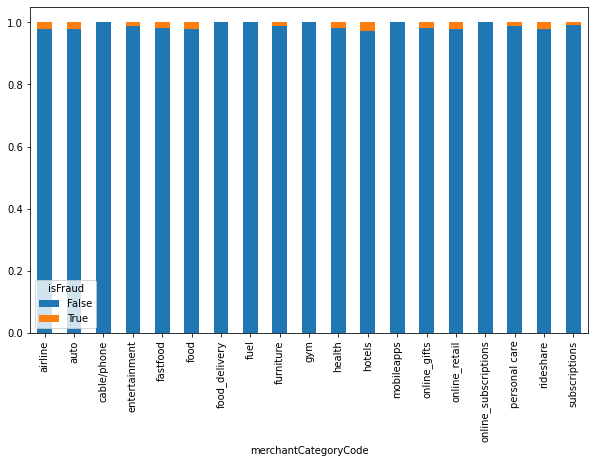

In [28]:
table=pd.crosstab(data.merchantCategoryCode,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label')

In [29]:
table=pd.crosstab(data.merchantCategoryCode,data.isFraud,normalize='index')
table

isFraud,False,True
merchantCategoryCode,,
airline,0.979379,0.020621
auto,0.979206,0.020794
cable/phone,1.000000,0.000000
entertainment,0.986578,0.013422
fastfood,0.982835,0.017165
food,0.979632,0.020368
food_delivery,1.000000,0.000000
fuel,1.000000,0.000000
furniture,0.987201,0.012799


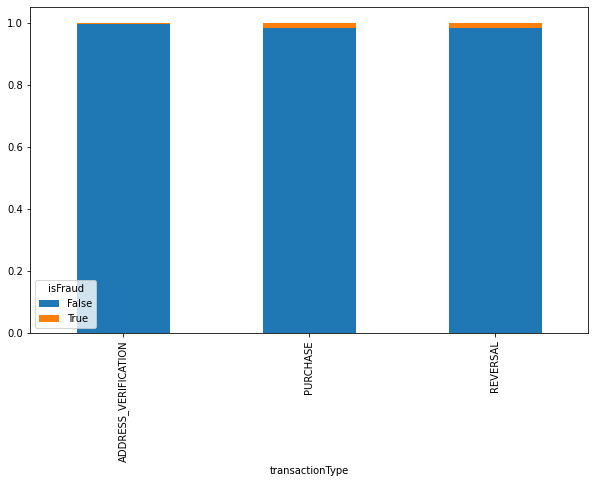

In [30]:
table=pd.crosstab(data.transactionType,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label'))

In [32]:
table=pd.crosstab(data.transactionType,data.isFraud,normalize='index')
table

isFraud,False,True
transactionType,,
ADDRESS_VERIFICATION,0.994720,0.005280
PURCHASE,0.982074,0.017926
REVERSAL,0.981871,0.018129


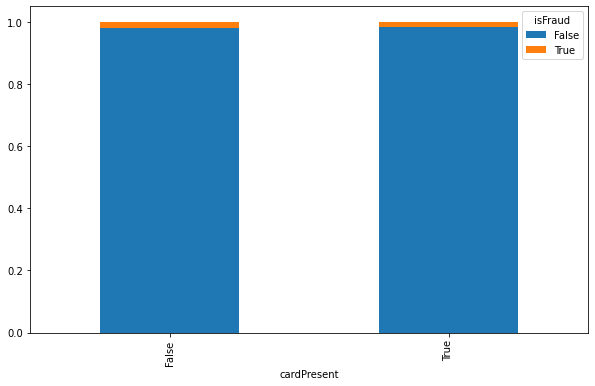

In [33]:
table=pd.crosstab(data.cardPresent,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label'))

In [34]:
table=pd.crosstab(data.cardPresent,data.isFraud,normalize='index')
table

isFraud,False,True
cardPresent,,
False,0.980544,0.019456
True,0.984482,0.015518


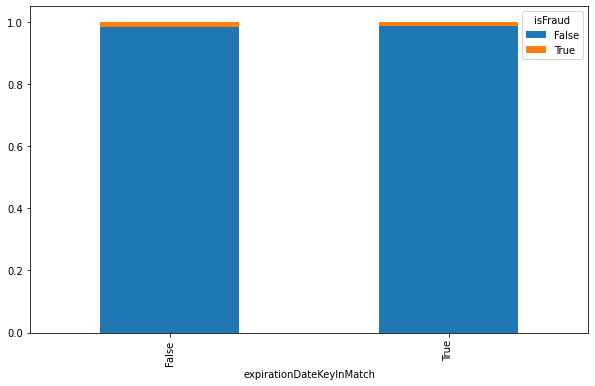

In [ ]:
table=pd.crosstab(data.expirationDateKeyInMatch,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
#plt.title('Title')
#plt.xlabel('X label')
#plt.ylabel('Y label'))

In [35]:
table=pd.crosstab(data.expirationDateKeyInMatch,data.isFraud,normalize='index')
table

isFraud,False,True
expirationDateKeyInMatch,,
False,0.982387,0.017613
True,0.986584,0.013416


**Bivariate Analysis (Numerical) with Target Variable**

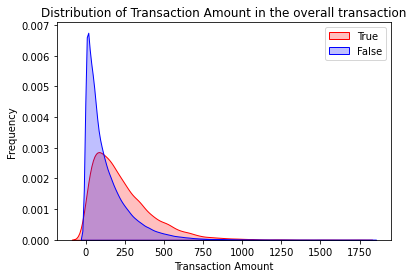

In [36]:
g = sns.kdeplot(data.transactionAmount[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.transactionAmount[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Transaction Amount")
g.set_ylabel("Frequency")
plt.title('Distribution of Transaction Amount in the overall transaction')
g = g.legend([True, False])

- fraud tendency besar transaksi lebih tinggi dibandingkan yg tidak fraud

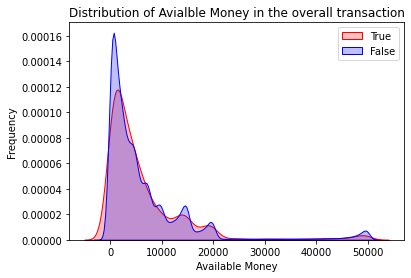

In [37]:
g = sns.kdeplot(data.availableMoney[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.availableMoney[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Available Money")
g.set_ylabel("Frequency")
plt.title('Distribution of Avialble Money in the overall transaction')
g = g.legend([True, False])

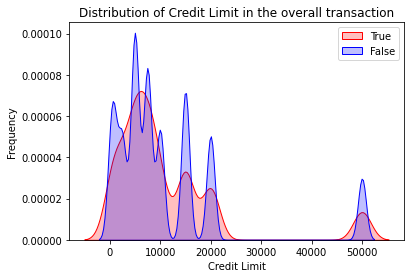

In [38]:
g = sns.kdeplot(data.creditLimit[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.creditLimit[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Credit Limit")
g.set_ylabel("Frequency")
plt.title('Distribution of Credit Limit in the overall transaction')
g = g.legend([True, False])

# Feature Engineering

Manfaat: https://towardsdatascience.com/feature-engineering-what-powers-machine-learning-93ab191bcc2d

**Untuk Feature Engineering, diperlukan domain knowledge untuk membuat column atau feature baru dimana feature atau column yang baru harus make sense secara business intuition**

In [39]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

**Membuat dataframe baru untuk dibuat menjadi feature engineering sehingga dataframe original tidak berubah, gampang untuk kembali / melakukan step featue engineering**

In [41]:
tmp_df = data

In [42]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


**Number of days between card registration and transaction**

Setelah itu saya mengubahnya sehingga hanya akan menunjukkan jumlah harinya

In [43]:
tmp_df['daysSinceRegister'] = tmp_df['accountOpenDate'].sub(tmp_df['transactionDateTime'], axis=0)
tmp_df['daysSinceRegister']  = tmp_df['daysSinceRegister']  / np.timedelta64(1, 'D') #mengubah menjadi number of days saja

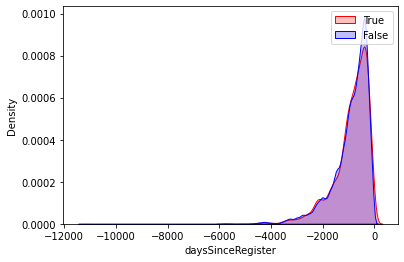

In [46]:
g = sns.kdeplot(data.daysSinceRegister[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.daysSinceRegister[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

**Number of days between Card Expiry Date and transaction**

Setelah itu saya mengubahnya sehingga hanya akan menunjukkan jumlah harinya

In [47]:
tmp_df['daysToExpiration'] = tmp_df['currentExpDate'].sub(tmp_df['transactionDateTime'], axis=0)
tmp_df['daysToExpiration']  = tmp_df['daysToExpiration']  / np.timedelta64(1, 'D')

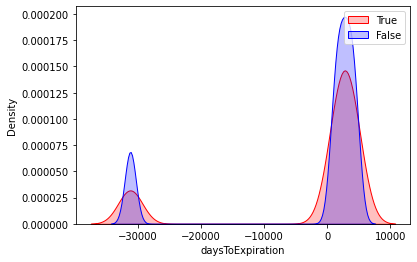

In [48]:
g = sns.kdeplot(data.daysToExpiration[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.daysToExpiration[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

**Number of days between Last Address Change and transaction**

Setelah itu saya mengubahnya sehingga hanya akan menunjukkan jumlah harinya

In [49]:
tmp_df['daySinceLastAddressChange'] = tmp_df['dateOfLastAddressChange'].sub(tmp_df['transactionDateTime'], axis=0)
tmp_df['daySinceLastAddressChange']  = tmp_df['daySinceLastAddressChange']  / np.timedelta64(1, 'D')

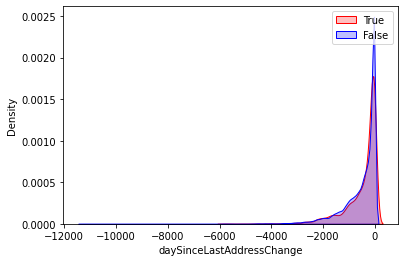

In [50]:
g = sns.kdeplot(data.daySinceLastAddressChange[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.daySinceLastAddressChange[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

**Number of days between Last Address Change and Account Open Date**

Setelah itu saya mengubahnya sehingga hanya akan menunjukkan jumlah harinya

In [51]:
tmp_df['LastAddressChangeDiff'] = tmp_df['dateOfLastAddressChange'].sub(tmp_df['accountOpenDate'], axis=0)
tmp_df['LastAddressChangeDiff']  = tmp_df['LastAddressChangeDiff']  / np.timedelta64(1, 'D')

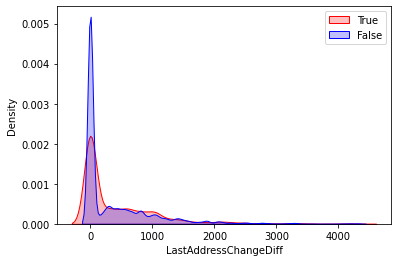

In [52]:
g = sns.kdeplot(data.LastAddressChangeDiff[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.LastAddressChangeDiff[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

**Pengambilan Jam, Day of Week, Day, dan Bulan dari Transaction DateTime**



In [53]:
tmp_df['trx_hour'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).hour)
tmp_df['trx_day_of_week'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).dayofweek)
tmp_df['trx_day'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).day)
tmp_df['trx_month'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).month)

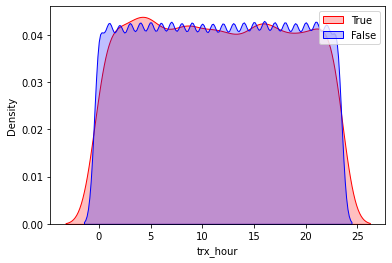

In [54]:
g = sns.kdeplot(data.trx_hour[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.trx_hour[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

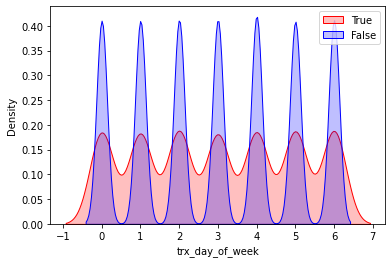

In [55]:
g = sns.kdeplot(data.trx_day_of_week[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.trx_day_of_week[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

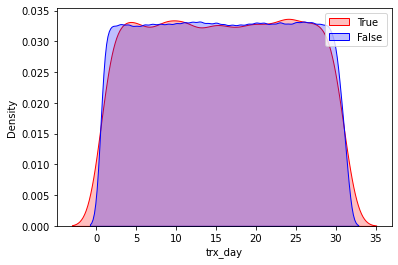

In [56]:
g = sns.kdeplot(data.trx_day[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.trx_day[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

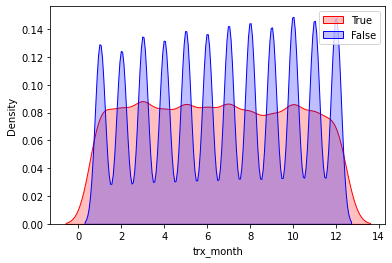

In [57]:
g = sns.kdeplot(data.trx_month[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.trx_month[(data["isFraud"] == False) ], ax =g, color="Blue", shade= True)
g.legend([True, False])

**Cek apakah enteredCVV dan cardCVV sama**



In [58]:
tmp_df['CVVMatch'] = np.where((tmp_df['cardCVV'] == tmp_df['enteredCVV']), True, False)

**Hasil Feature Engineering**


In [59]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month,CVVMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,False,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,False,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,False,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,False,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,False,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1,True


In [60]:
tmp_df.drop(columns=['transactionDateTime','accountOpenDate','currentExpDate','dateOfLastAddressChange','cardCVV','enteredCVV',
                     'cardLast4Digits','merchantName'], axis = 1,inplace = True)
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month,CVVMatch
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,False,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1,True
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,False,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1,True
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,False,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1,True
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,False,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1,True
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,False,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1,True


In [61]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   accountNumber              641914 non-null  int64  
 1   customerId                 641914 non-null  int64  
 2   creditLimit                641914 non-null  int64  
 3   availableMoney             641914 non-null  float64
 4   transactionAmount          641914 non-null  float64
 5   acqCountry                 641914 non-null  object 
 6   merchantCountryCode        641914 non-null  object 
 7   posEntryMode               641914 non-null  float64
 8   posConditionCode           641914 non-null  float64
 9   merchantCategoryCode       641914 non-null  object 
 10  transactionType            641914 non-null  object 
 11  isFraud                    641914 non-null  bool   
 12  currentBalance             641914 non-null  float64
 13  cardPresent                64

In [62]:
#tmp_df.drop(columns=['accountNumber','customerId'], axis = 1,inplace = True)
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month,CVVMatch
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,False,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1,True
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,False,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1,True
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,False,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1,True
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,False,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1,True
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,False,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1,True


In [63]:
binary_col = ['isFraud','cardPresent','expirationDateKeyInMatch','CVVMatch']
for col in binary_col:
    tmp_df[col] = tmp_df[col].apply(lambda x: 1 if x == True else 0)

In [64]:
char_column = ['acqCountry','posConditionCode','posEntryMode','transactionType',
               'merchantCategoryCode','merchantCountryCode']

In [65]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month,CVVMatch
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,0,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1,1
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,0,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1,1
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,0,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1,1
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,0,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1,1
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,0,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1,1


In [66]:
from scipy.stats import chi2_contingency

## Feature Selection

In [67]:
chi2_array, p_array = [], []
for column in char_column:

    crosstab = pd.crosstab(tmp_df[column], tmp_df['isFraud'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': char_column,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
2,posEntryMode,2313.799914,0.000000e+00
4,merchantCategoryCode,1717.856308,0.000000e+00
1,posConditionCode,238.129319,1.953779e-52
3,transactionType,148.612523,5.360443e-33
5,merchantCountryCode,21.618955,7.829090e-05
0,acqCountry,17.853153,4.716113e-04


- chi square makin kecil, p value lebih kecil
- semakin kecil p value semakin bagus

In [68]:
char_column = ['acqCountry','posConditionCode','transactionType','merchantCountryCode']

## One Hot Encoding untuk categorical Data

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder = OneHotEncoder(categories='auto').fit(tmp_df[char_column])

In [71]:
transformed_data = encoder.transform(tmp_df[char_column]).toarray()
transformed_data


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [72]:
transformed_data = pd.DataFrame(transformed_data,columns=encoder.get_feature_names(char_column))
transformed_data

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,acqCountry_US,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
641910,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
641911,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
641912,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
tmp_df = tmp_df.reset_index()
tmp_df = pd.concat([tmp_df, transformed_data], axis=1)

In [74]:
tmp_df = tmp_df.drop(columns=char_column)
tmp_df.head()

,index,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,merchantCategoryCode,isFraud,currentBalance,...,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,0,733493772,733493772,5000,5000.00,111.33,5.0,rideshare,1,0.00,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,733493772,733493772,5000,4888.67,24.75,9.0,rideshare,0,111.33,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,733493772,733493772,5000,4863.92,187.40,5.0,rideshare,0,136.08,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,733493772,733493772,5000,4676.52,227.34,2.0,rideshare,1,323.48,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,733493772,733493772,5000,4449.18,0.00,2.0,rideshare,0,550.82,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
tmp_df.drop('index',inplace = True, axis = 1)
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,merchantCategoryCode,isFraud,currentBalance,cardPresent,...,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,733493772,733493772,5000,5000.00,111.33,5.0,rideshare,1,0.00,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,733493772,733493772,5000,4888.67,24.75,9.0,rideshare,0,111.33,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,733493772,733493772,5000,4863.92,187.40,5.0,rideshare,0,136.08,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,733493772,733493772,5000,4676.52,227.34,2.0,rideshare,1,323.48,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,733493772,733493772,5000,4449.18,0.00,2.0,rideshare,0,550.82,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Feature Selection

Disini saya mengambil semua column sebagai feature dan fraud column sebagai target

In [76]:
y = tmp_df['isFraud']
tmp_df = tmp_df.drop(columns=['isFraud'])

In [77]:
tmp_df.drop(['merchantCategoryCode', 'posEntryMode'], axis = 1, inplace = True)

In [78]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,...,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,733493772,733493772,5000,5000.00,111.33,0.00,0,0,-523.795023,1544.204977,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,733493772,733493772,5000,4888.67,24.75,111.33,0,0,-524.939340,2699.060660,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,733493772,733493772,5000,4863.92,187.40,136.08,0,0,-526.567303,4341.432697,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,733493772,733493772,5000,4676.52,227.34,323.48,0,0,-526.949838,4981.050162,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,733493772,733493772,5000,4449.18,0.00,550.82,0,0,-531.070266,3180.929734,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
tmp_df.columns

Index(['accountNumber',
       'customerId',
       'creditLimit',
       'availableMoney',
       'transactionAmount',
       'currentBalance',
       'cardPresent',
       'expirationDateKeyInMatch',
       'daysSinceRegister',
       'daysToExpiration',
       'daySinceLastAddressChange',
       'LastAddressChangeDiff',
       'trx_hour',
       'trx_day_of_week',
       'trx_day',
       'trx_month',
       'CVVMatch',
       'acqCountry_CAN',
       'acqCountry_MEX',
       'acqCountry_PR',
       'acqCountry_US',
       'posConditionCode_1.0',
       'posConditionCode_8.0',
       'posConditionCode_99.0',
       'transactionType_ADDRESS_VERIFICATION',
       'transactionType_PURCHASE',
       'transactionType_REVERSAL',
       'merchantCountryCode_CAN',
       'merchantCountryCode_MEX',
       'merchantCountryCode_PR',
       'merchantCountryCode_US'],
      dtype='object')

In [80]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   accountNumber                         641914 non-null  int64  
 1   customerId                            641914 non-null  int64  
 2   creditLimit                           641914 non-null  int64  
 3   availableMoney                        641914 non-null  float64
 4   transactionAmount                     641914 non-null  float64
 5   currentBalance                        641914 non-null  float64
 6   cardPresent                           641914 non-null  int64  
 7   expirationDateKeyInMatch              641914 non-null  int64  
 8   daysSinceRegister                     641914 non-null  float64
 9   daysToExpiration                      641914 non-null  float64
 10  daySinceLastAddressChange             641914 non-null  float64
 11  

In [81]:
tmp_df.drop(columns=['accountNumber','customerId'],axis = 1, inplace = True)

# Modelling

## Data Splitting menjadi Train dan Test Set

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model = GradientBoostingClassifier()
# model = SVC()

#model.fit(X_train,y_train)

## Logistic Regression

In [84]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = LR.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

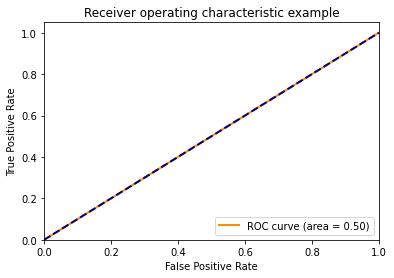

In [86]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      3442
           0       0.98      1.00      0.99    189133

    accuracy                           0.98    192575
   macro avg       0.49      0.50      0.50    192575
weighted avg       0.96      0.98      0.97    192575



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random forest

In [88]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

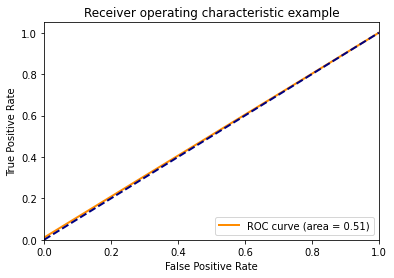

In [89]:
y_pred = RF.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.01      0.02      3442
           0       0.98      1.00      0.99    189133

    accuracy                           0.98    192575
   macro avg       0.99      0.51      0.51    192575
weighted avg       0.98      0.98      0.97    192575



In [92]:
37/(37+3405)

0.01074956420685648

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


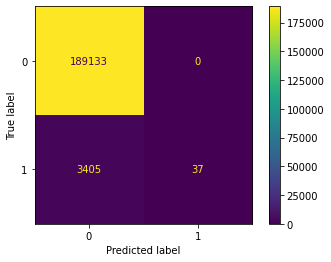

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

## Handling Imbalanced Data

### Over Sampling

In [93]:
from imblearn.over_sampling import SMOTENC

In [ ]:
#sm = SMOTENC(random_state=42, categorical_features=[4,5,14,15,16,17,18,19,20,21,22,23,
#                                                    24,25,26,27,28,29,30,31,32,33,34,35,36,37,
#                                                    38,39,40,41,42,43,44,45,46,47,48,49,
#                                                    50,51,52,53,54])
#x_upnew, y_upnew = sm.fit_resample(X_train,y_train)

- data besar sehingga lebih baik undersampling

### UnderSampling

In [94]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler()

In [95]:
x_new, y_new = rus.fit_resample(X_train,y_train)

In [96]:
LR = LogisticRegression()
LR.fit(x_new,y_new)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred = LR.predict(X_test)

In [98]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

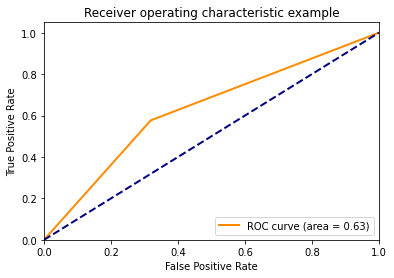

In [99]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.03      0.58      0.06      3442
           0       0.99      0.68      0.81    189133

    accuracy                           0.68    192575
   macro avg       0.51      0.63      0.43    192575
weighted avg       0.97      0.68      0.79    192575



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


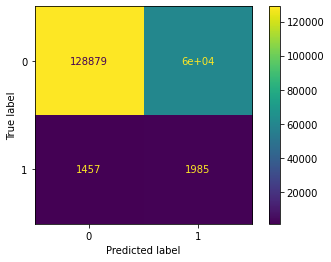

In [101]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [102]:
RF = RandomForestClassifier()
RF.fit(x_new,y_new)

RandomForestClassifier()

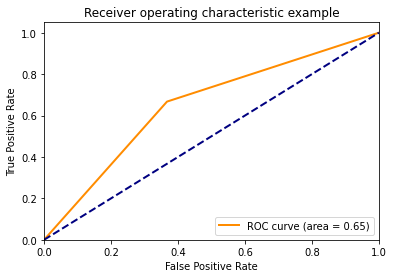

In [103]:
y_pred = RF.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.03      0.67      0.06      3442
           0       0.99      0.63      0.77    189133

    accuracy                           0.63    192575
   macro avg       0.51      0.65      0.42    192575
weighted avg       0.97      0.63      0.76    192575



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


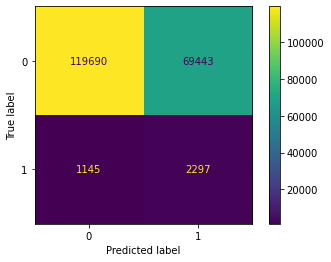

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [125]:
RF1 = RandomForestClassifier(n_estimators= 377,
                             min_samples_split= 10,
                             min_samples_leaf= 4,
                             max_features= 'sqrt',
                             max_depth= 100,
                             bootstrap= False, 
                             criterion='gini')
RF1.fit(x_new,y_new) 

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=377)

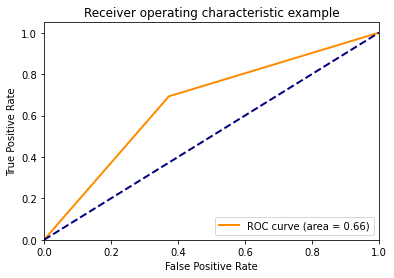

In [129]:
y_pred = RF1.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.03      0.69      0.06      3442
           0       0.99      0.63      0.77    189133

    accuracy                           0.63    192575
   macro avg       0.51      0.66      0.42    192575
weighted avg       0.97      0.63      0.76    192575



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


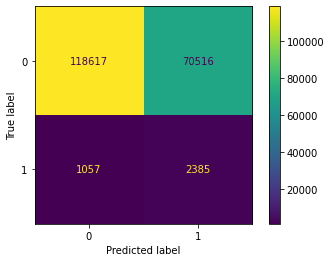

In [131]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF1, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

### Model Intepretability

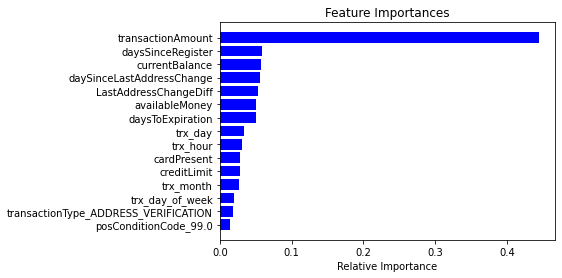

In [110]:
#feat_importances = pd.Series(RF1.feature_importances_, index=tmp_df.columns)
#feat_importances.nlargest(20).plot(kind='barh')
features = tmp_df.columns
importances = RF1.feature_importances_
indices = np.argsort(importances)[-15:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


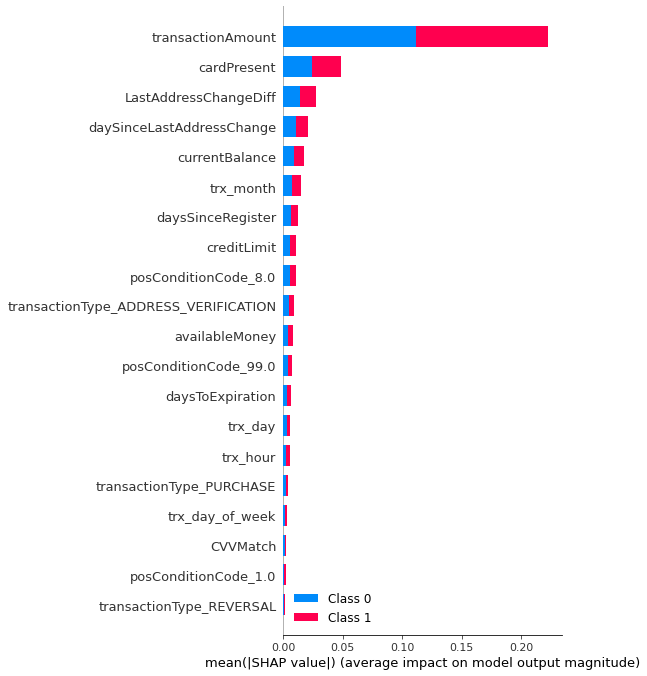

In [121]:
!pip install shap
import shap
import matplotlib.pyplot as plt
shap_values = shap.TreeExplainer(RF1).shap_values(x_new)
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("/content/summary_plot1.png", bbox_inches='tight', dpi=600)

### Hyperparameter Tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [119]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_new, y_new)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 377,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [112]:
GBC = GradientBoostingClassifier()
GBC.fit(x_new,y_new)

GradientBoostingClassifier()

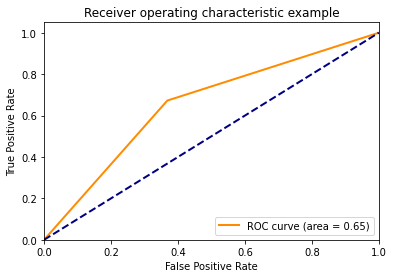

In [113]:
y_pred = GBC.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.03      0.67      0.06      3442
           0       0.99      0.63      0.77    189133

    accuracy                           0.63    192575
   macro avg       0.51      0.65      0.42    192575
weighted avg       0.97      0.63      0.76    192575



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


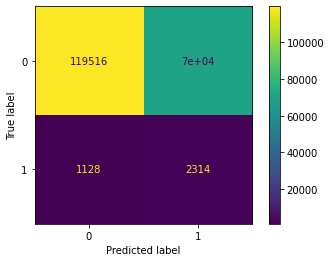

In [115]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(GBC, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP